In [129]:
import numpy as np
import pandas as pd
# 1.2 For plotting
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl     # For creating colormaps
import seaborn as sns
# 1.3 For data processing
from sklearn.preprocessing import StandardScaler
# 1.4 OS related
import os

In [130]:
os.chdir("D:\\data analyst data\\download data")

In [131]:
os.listdir()

['07022020',
 '1.ta_feng_groupby_simple.py',
 '15022020',
 'About Ta Feng dataset.txt',
 'archive',
 'bigdata5',
 'books',
 'Border_Crossing_Entry_Data.csv.zip',
 'dall.csv.zip',
 'delhi_weather_data.zip',
 'final_file.ipynb',
 'labels.csv',
 'lubuntu18_fresh',
 'lubuntu_influxDB',
 'lubuntu_spark',
 'lubuntu_spark_new2',
 'resize',
 'siftData.csv',
 'ubuntu_spark',
 'weekOfJune12',
 'weekOfJune19']

In [132]:
data = pd.read_csv("Border_Crossing_Entry_Data.csv.zip",
                   parse_dates = ['Date']
                  )

In [145]:
data

,port_name,state,port_code,border,date,measure,value,location
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67)


In [146]:
data.head()

,port_name,state,port_code,border,date,measure,value,location
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [147]:
data.dtypes

port_name            object
state                object
port_code             int64
border               object
date         datetime64[ns]
measure              object
value                 int64
location             object
dtype: object

In [148]:
data.info() # check for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   port_name  346733 non-null  object        
 1   state      346733 non-null  object        
 2   port_code  346733 non-null  int64         
 3   border     346733 non-null  object        
 4   date       346733 non-null  datetime64[ns]
 5   measure    346733 non-null  object        
 6   value      346733 non-null  int64         
 7   location   346733 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 21.2+ MB


In [149]:
data.columns

Index(['port_name', 'state', 'port_code', 'border', 'date', 'measure', 'value',
       'location'],
      dtype='object')

In [150]:
data.rename({
             'Port Name' : 'port_name',
             'State'     : 'state',
             'Port Code' : 'port_code',
             'Border'    : 'border',
             'Date'      : 'date',
             'Measure'   : 'measure',
             'Value'     : 'value',
             'Location'  : 'location'
             },inplace='True',axis=1)
data

,port_name,state,port_code,border,date,measure,value,location
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67)


In [151]:
data['port_name'].nunique()

116

In [152]:
data['port_code'].nunique()  # port_code and port_name are not the same

117

In [153]:
diff= data[['port_name' , 'port_code']].drop_duplicates()
diff[diff['port_name'].duplicated(keep = False)] 

,port_name,port_code
29,Eastport,3302
217,Eastport,103


In [154]:
data.loc[(data.port_code == 103) | (data.port_code == 3302)]

,port_name,state,port_code,border,date,measure,value,location
29,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Trains,101,POINT (-116.18027999999998 48.99944)
41,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Pedestrians,200,POINT (-116.18027999999998 48.99944)
129,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Train Passengers,200,POINT (-116.18027999999998 48.99944)
217,Eastport,Maine,103,US-Canada Border,2019-03-01,Trucks,165,POINT (-66.99387 44.90357)
249,Eastport,Maine,103,US-Canada Border,2019-03-01,Pedestrians,3,POINT (-66.99387 44.90357)
...,...,...,...,...,...,...,...,...
346152,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Truck Containers Empty,26,POINT (-116.17999999999999 49)
346158,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Rail Containers Empty,101,POINT (-116.17999999999999 49)
346282,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Pedestrians,160,POINT (-116.17999999999999 49)
346445,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Truck Containers Full,3250,POINT (-116.17999999999999 49)


In [155]:
data.loc[(data['port_name'] == 'Eastport') & (data['state'] == 'Maine'), 'port_name'] = 'Eastport Maine' 
# Rename Eastport located in Maine to 'Eastport Maine' to avoid confusion


In [156]:
data.loc[(data.port_code == 103) | (data.port_code == 3302)]

,port_name,state,port_code,border,date,measure,value,location
29,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Trains,101,POINT (-116.18027999999998 48.99944)
41,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Pedestrians,200,POINT (-116.18027999999998 48.99944)
129,Eastport,Idaho,3302,US-Canada Border,2019-03-01,Train Passengers,200,POINT (-116.18027999999998 48.99944)
217,Eastport Maine,Maine,103,US-Canada Border,2019-03-01,Trucks,165,POINT (-66.99387 44.90357)
249,Eastport Maine,Maine,103,US-Canada Border,2019-03-01,Pedestrians,3,POINT (-66.99387 44.90357)
...,...,...,...,...,...,...,...,...
346152,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Truck Containers Empty,26,POINT (-116.17999999999999 49)
346158,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Rail Containers Empty,101,POINT (-116.17999999999999 49)
346282,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Pedestrians,160,POINT (-116.17999999999999 49)
346445,Eastport,Idaho,3302,US-Canada Border,1996-01-01,Truck Containers Full,3250,POINT (-116.17999999999999 49)


In [157]:
data['port_code'].nunique()

117

In [158]:
data['port_name'].nunique() # port code and port name are now same

117

In [159]:
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
data['weekdays'] = data.date.dt.weekday
data['weekday'] =  data.date.dt.weekday
data['weekday'] = data ['weekday'].map ({ 
                      0: 'Monday',
                      1: 'Tuesday',
                      2: 'Wednesday',
                      3: 'Thursday',
                      4: 'Friday',
                      5: 'Saturday',
                      6: 'Sunday'
                    }
                  )
data

,port_name,state,port_code,border,date,measure,value,location,year,month,weekdays,weekday
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,4,Friday
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,4,Friday
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,4,Friday
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,4,Friday
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,0,Monday
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,0,Monday
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,1,0,Monday
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,1,0,Monday


<AxesSubplot:xlabel='border', ylabel='value'>

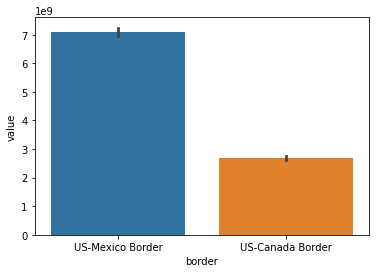

In [188]:
#1) What are total passengers travelled accross bonders

sns.barplot(x = 'border', y = 'value', data = data, estimator =sum)

In [160]:
data['measure'].unique()

array(['Trucks', 'Rail Containers Full', 'Trains',
       'Personal Vehicle Passengers', 'Bus Passengers',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full',
       'Pedestrians', 'Train Passengers'], dtype=object)

In [161]:
gen_public =['Personal Vehicle Passengers','Bus Passengers','Personal Vehicles','Pedestrians','Train Passengers']
data.loc[data['measure'].isin(gen_public),'vehicle_cat'] ='gen_public_vehicle'
data.loc[~data['measure'].isin(gen_public),'vehicle_cat'] ='commercial_vehicle'
data['vehicle_cat'].unique()

array(['commercial_vehicle', 'gen_public_vehicle'], dtype=object)

In [162]:
data

,port_name,state,port_code,border,date,measure,value,location,year,month,weekdays,weekday,vehicle_cat
0,Calexico East,California,2507,US-Mexico Border,2019-03-01,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,4,Friday,commercial_vehicle
1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,4,Friday,commercial_vehicle
2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217,POINT (-117.05333 32.57333),2019,3,4,Friday,commercial_vehicle
3,Nogales,Arizona,2604,US-Mexico Border,2019-03-01,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,4,Friday,commercial_vehicle
4,Trout River,New York,715,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,4,Friday,gen_public_vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,0,Monday,gen_public_vehicle
346729,Columbus,New Mexico,2406,US-Mexico Border,1996-01-01,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,0,Monday,gen_public_vehicle
346730,Hansboro,North Dakota,3415,US-Canada Border,1996-01-01,Rail Containers Full,0,POINT (-99.35 49),1996,1,0,Monday,commercial_vehicle
346731,Calexico East,California,2507,US-Mexico Border,1996-01-01,Buses,0,POINT (-115.39 32.67),1996,1,0,Monday,commercial_vehicle


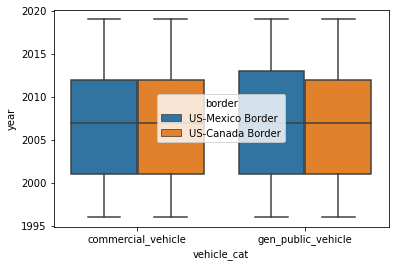

In [163]:
ax = sns.boxplot(x = 'vehicle_cat' , y = 'year', hue = 'border', data = data )

<Figure size 864x720 with 0 Axes>

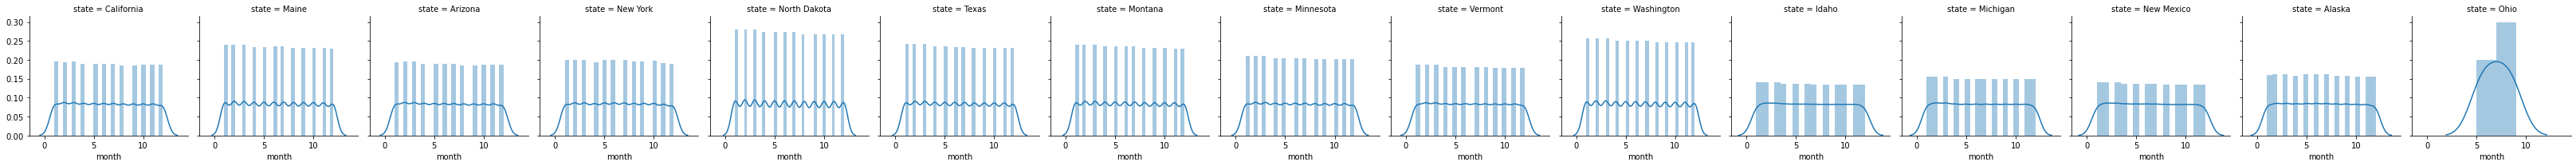

In [169]:
plt.figure(figsize=(12,10))
facet = sns.FacetGrid(data, col = 'state')
facet.map(sns.distplot, 'month')

<AxesSubplot:xlabel='border', ylabel='value'>

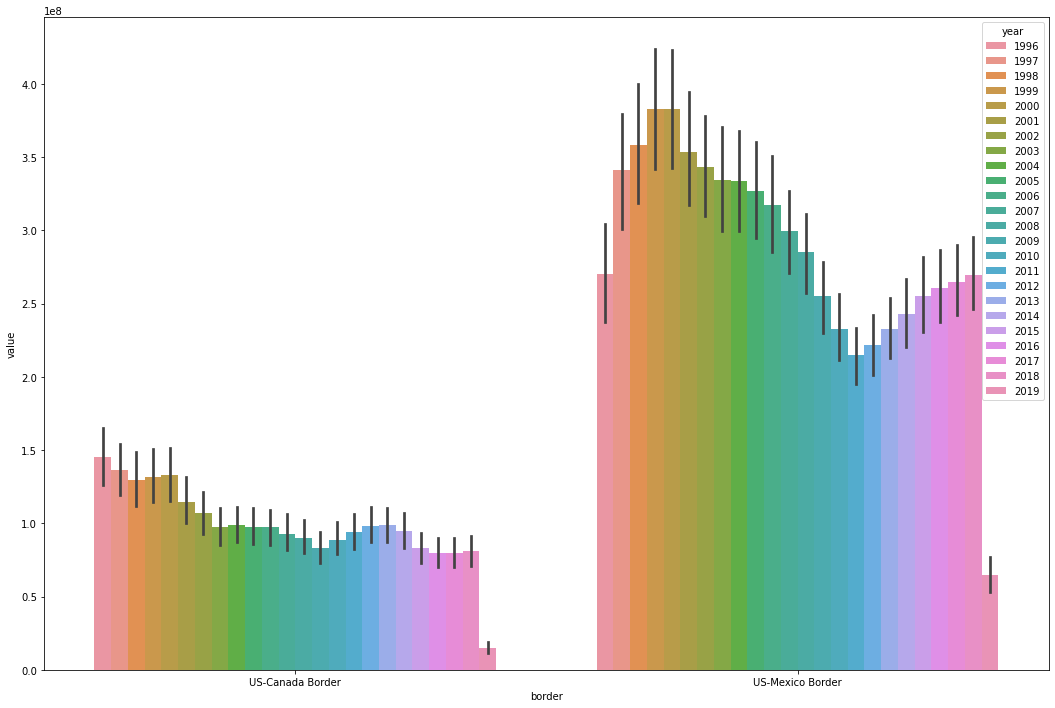

In [172]:
#2) What are total general public travelled accross bonders year vise
plt.figure(figsize=(18,12))
sns.barplot(data=data[data.vehicle_cat == 'gen_public_vehicle'], x='border',y='value' , hue = 'year' ,estimator = sum)

<AxesSubplot:xlabel='border', ylabel='value'>

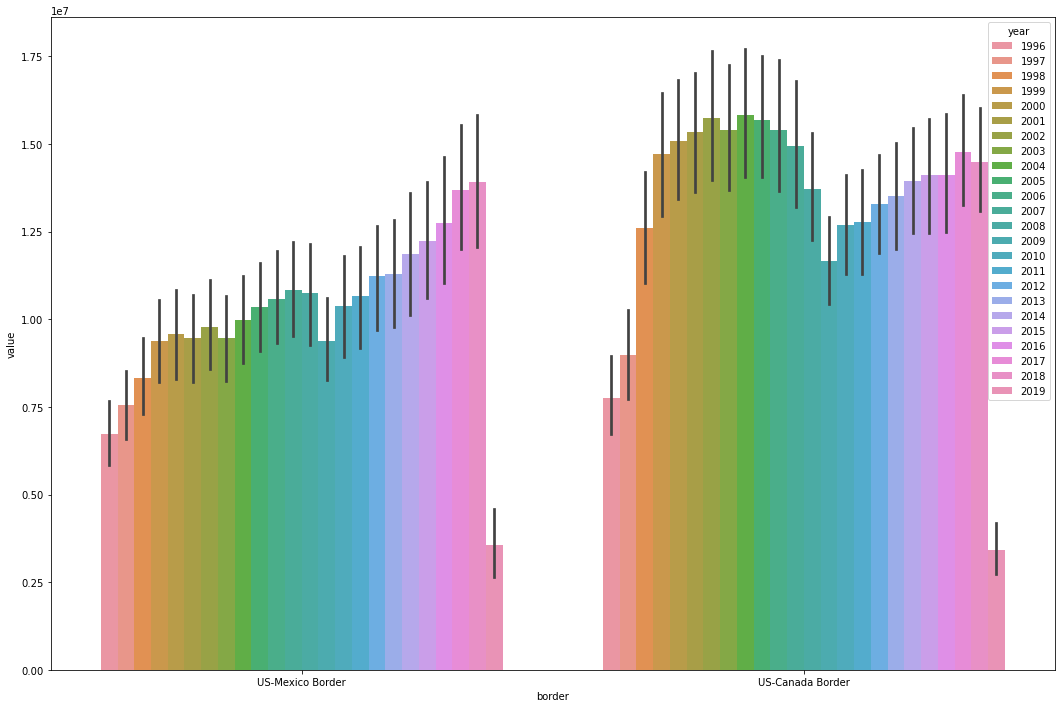

In [173]:
#3) What are total commercial_vehicle travelled accross bonders year vise 
plt.figure(figsize=(18,12))
sns.barplot(data=data[data.vehicle_cat =='commercial_vehicle'], x='border',y='value', hue = 'year',estimator = sum)

In [189]:
# Use group by method to find sum of values for all general public for borders 
data1= data[data.vehicle_cat=='gen_public_vehicle'].groupby(['border','measure']).sum().value.reset_index()
data1 

,border,measure,value
0,US-Canada Border,Bus Passengers,74327495
1,US-Canada Border,Pedestrians,12968574
2,US-Canada Border,Personal Vehicle Passengers,1538658810
3,US-Canada Border,Personal Vehicles,736044372
4,US-Canada Border,Train Passengers,5909597
5,US-Mexico Border,Bus Passengers,68003376
6,US-Mexico Border,Pedestrians,1031249540
7,US-Mexico Border,Personal Vehicle Passengers,3918732465
8,US-Mexico Border,Personal Vehicles,1823646820
9,US-Mexico Border,Train Passengers,287853


In [191]:
# Use group by method to find sum of values for all commercial vehicle for borders 
data2= data[data.vehicle_cat=='commercial_vehicle'].groupby(['border','measure']).sum().value.reset_index()
data2

,border,measure,value
0,US-Canada Border,Buses,3093613
1,US-Canada Border,Rail Containers Empty,12350707
2,US-Canada Border,Rail Containers Full,30461135
3,US-Canada Border,Trains,700993
4,US-Canada Border,Truck Containers Empty,24647416
5,US-Canada Border,Truck Containers Full,106505603
6,US-Canada Border,Trucks,142294479
7,US-Mexico Border,Buses,5450143
8,US-Mexico Border,Rail Containers Empty,8788737
9,US-Mexico Border,Rail Containers Full,7827258


<AxesSubplot:xlabel='measure', ylabel='value'>

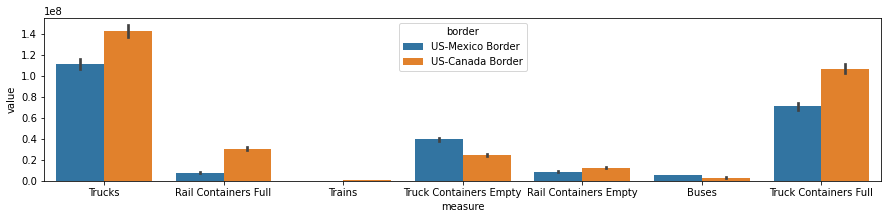

In [195]:
#4) What are diffrrent type of meaures and their sum for both borders- plot bar chart only for vehlcle
plt.figure(figsize=(15,3))
sns.barplot(data = data[data.vehicle_cat == 'commercial_vehicle']
            , x = 'measure', y= 'value' , hue = 'border', estimator = sum )

<AxesSubplot:xlabel='measure', ylabel='value'>

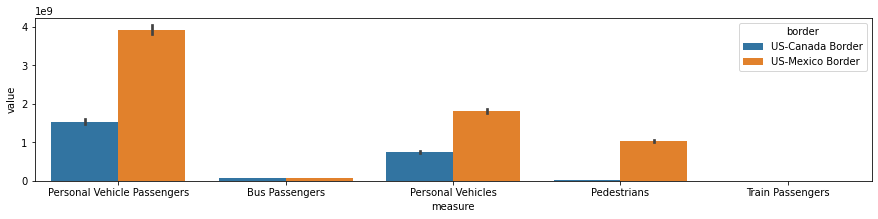

In [196]:
#5)What are diffrrent type of meaures and their sum for both borders- plot bar chart only for general public vehicle
plt.figure(figsize=(15,3))
sns.barplot(data = data[data.vehicle_cat == 'gen_public_vehicle']
            , x = 'measure', y= 'value' , hue = 'border' , estimator = sum)

In [198]:
#6) find sum of values for all measures
data.groupby('measure').sum().value


measure
Bus Passengers                  142330871
Buses                             8543756
Pedestrians                    1044218114
Personal Vehicle Passengers    5457391275
Personal Vehicles              2559691192
Rail Containers Empty            21139444
Rail Containers Full             38288393
Train Passengers                  6197450
Trains                             903864
Truck Containers Empty           64046035
Truck Containers Full           177190288
Trucks                          253654160
Name: value, dtype: int64

In [203]:
#8) which state has highest and lowest numebr vehicles travelled
state_travel = data.groupby(['state','vehicle_cat'])['value'].sum().sort_values(ascending=False).reset_index()
state_travel.head()

,state,vehicle_cat,value
0,Texas,gen_public_vehicle,3464790062
1,California,gen_public_vehicle,2445411406
2,Arizona,gen_public_vehicle,869838663
3,New York,gen_public_vehicle,746667079
4,Michigan,gen_public_vehicle,627830343


<AxesSubplot:xlabel='state', ylabel='value'>

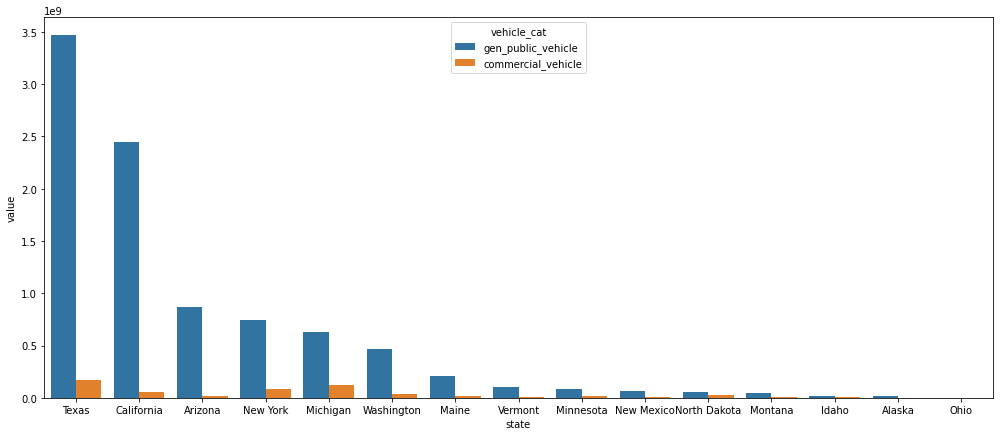

In [221]:
plt.figure(figsize=(17,7))
sns.barplot(x = 'state', y = 'value', data = state_travel, hue = 'vehicle_cat')

<AxesSubplot:xlabel='value', ylabel='port_name'>

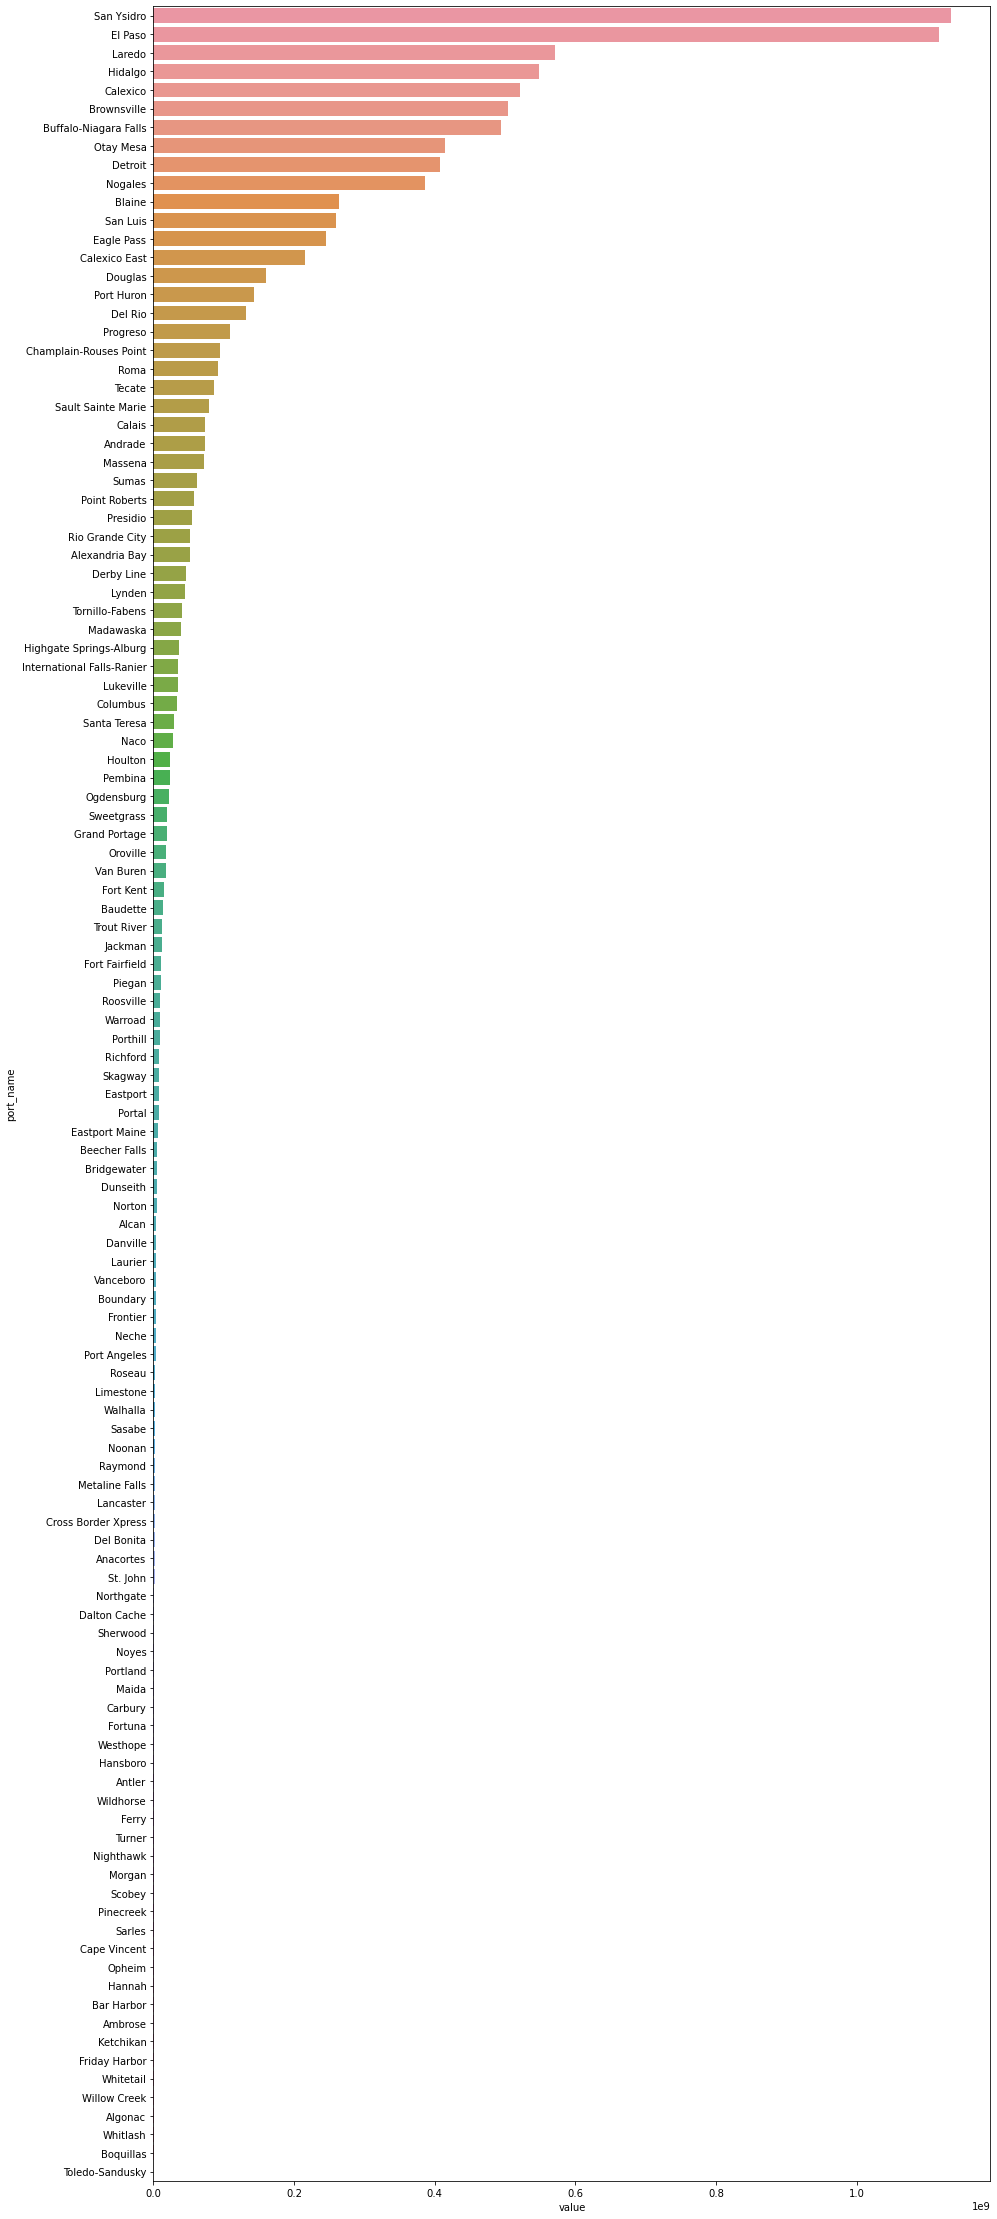

In [224]:
port_data=data.groupby(['port_name','vehicle_cat'])['value'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,40))
sns.barplot(data=port_data[port_data.vehicle_cat=='gen_public_vehicle'],y='port_name',x='value')

In [35]:
border_count = data.border.value_counts()
border_count

US-Canada Border    266187
US-Mexico Border     80546
Name: border, dtype: int64

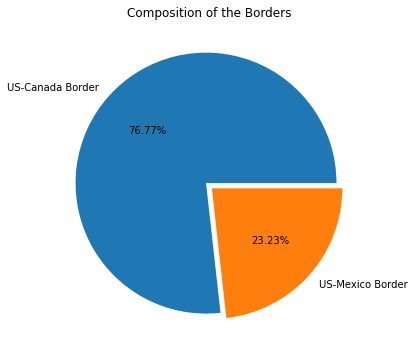

In [32]:
plt.figure(figsize=(7,6))
plt.pie(x = border_count.values,explode=[0.03,0.03], labels = border_count.index, autopct='%0.2f%%',)
plt.title('Composition of the Borders')
plt.show()

<AxesSubplot:xlabel='border', ylabel='value'>

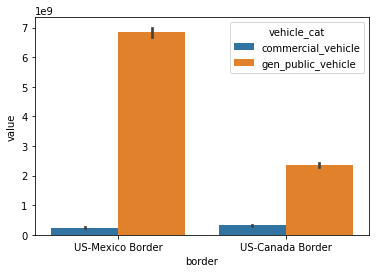

In [186]:
sns.barplot(x = 'border', y = 'value' , hue = 'vehicle_cat',data = data , estimator =sum)

<AxesSubplot:xlabel='vehicle_cat', ylabel='value'>

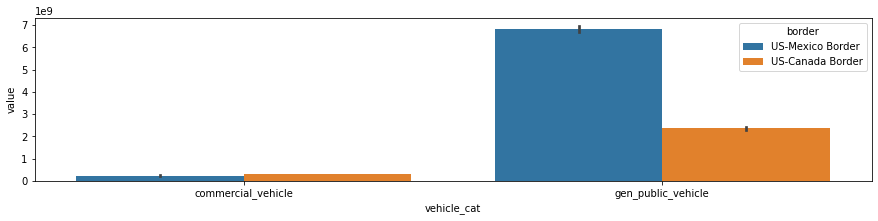

In [184]:
plt.figure(figsize=(15,3))
sns.barplot(data=data, x='vehicle_cat',y='value',hue='border',estimator =sum)

<AxesSubplot:xlabel='year'>

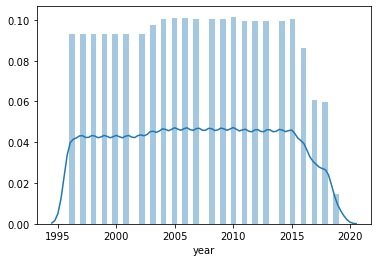

In [169]:
sns.distplot(data.year)

<AxesSubplot:xlabel='month'>

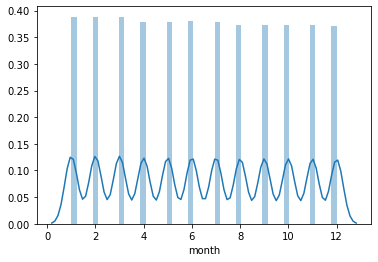

In [216]:
sns.distplot(data.month)

<AxesSubplot:xlabel='port_code'>

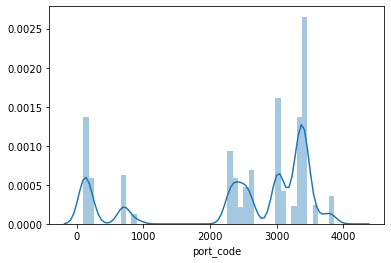

In [188]:
sns.distplot(data.port_code)

<AxesSubplot:xlabel='state', ylabel='value'>

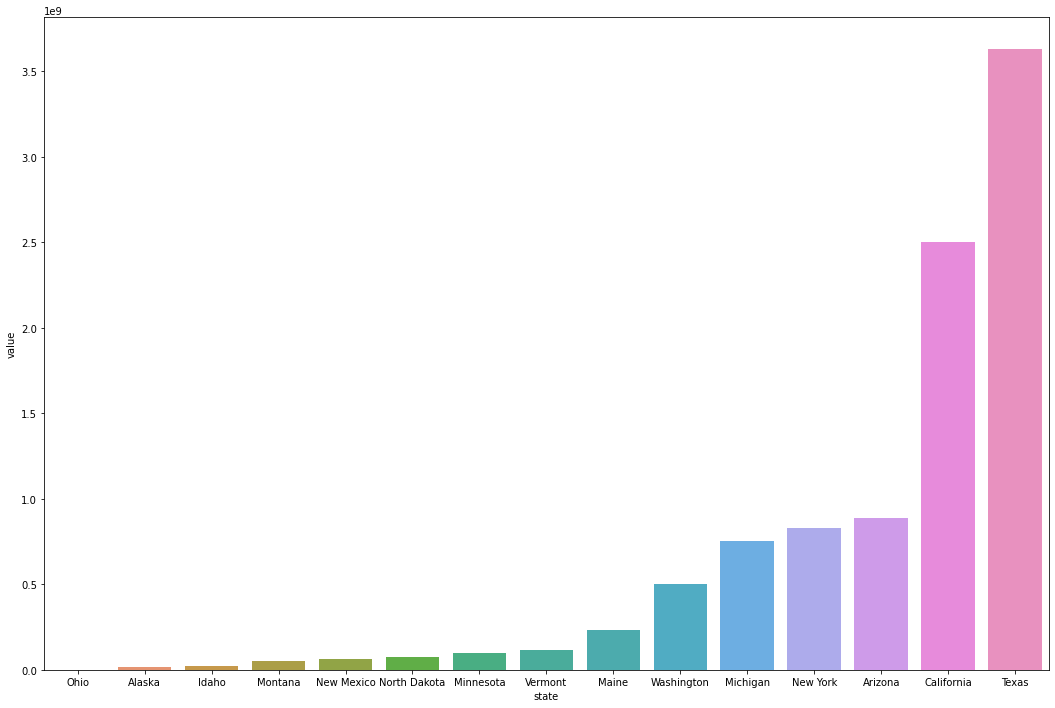

In [229]:
temp = pd.DataFrame(data.groupby('state')['value'].sum().sort_values()).reset_index()
plt.figure(figsize=(18,12))
sns.barplot(x = 'state' , y = 'value' , data = temp)

<AxesSubplot:xlabel='state', ylabel='weekdays'>

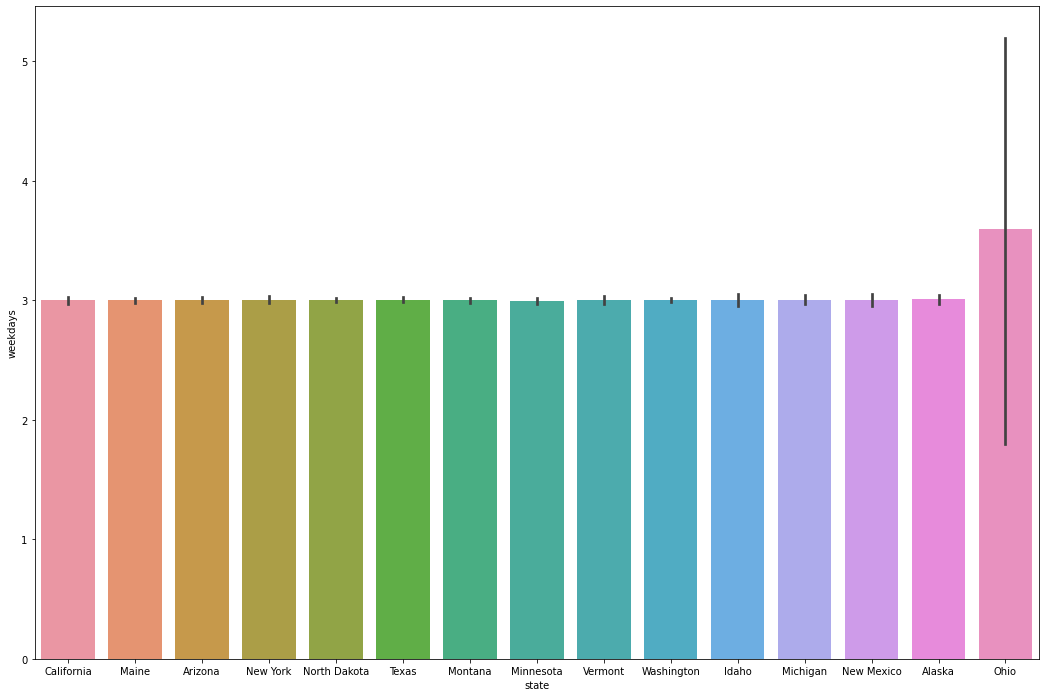

In [37]:
plt.figure(figsize=(18,12))

sns.barplot(x = 'state', y = 'weekdays', data = data)